In [5]:
import numpy as np
import math
import pandas as pd

from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization mode
from geneticalgorithm2 import Generation, AlgorithmParams # classes for comfortable parameters setting and getting
from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior
from geneticalgorithm2 import Population_initializer # for creating better start population
from geneticalgorithm2 import np_lru_cache # for cache function (if u want)
from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want
from geneticalgorithm2 import Actions, ActionConditions, MiddleCallbacks # middle callbacks

In [12]:
 #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
data = pd.read_csv ('data_6_4_LINGO.csv')
df = pd.DataFrame(data)
print(df)

s_array = df[["Widgets","Frisbees"]].to_numpy()
print(s_array)
s_array[2,1]

units_polyester = 12
units_polypropylene = 10
benef_widget = s_array[2,0]
benef_frisbee = s_array[2,1]

   Widgets  Frisbees
0        3         5
1        6         2
2        3         4
[[3 5]
 [6 2]
 [3 4]]


In [13]:
def f(X):
    pen = 0
    if X[0]*s_array[0,0] + X[1]*s_array[0,1] > units_polyester:
        pen += 11 + abs(X[0]*s_array[0,0] + X[1]*s_array[0,1] - units_polyester)
    if X[0]*s_array[1,0] + X[1]*s_array[1,1] > units_polypropylene:
        pen += 11 + abs(X[0]*s_array[1,0] + X[1]*s_array[1,1] - units_polypropylene)
    res = X[0]*benef_widget + X[1]*benef_frisbee - pen
    return -res

In [14]:
algorithm_param = {'max_num_iteration': 100,\
                   'population_size': 100,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'parents_portion': 0.3,\
                   'crossover_type':'one_point',\
                   'mutation_type':'gauss_by_center',\
                   'selection_type':'tournament',\
                   'max_iteration_without_improv':100}


Average time of function evaluating (secs): 0.0004101395606994629 (total = 0.04101395606994629)

Best score before optimization: -8.0
                                                                                                                                                                                                        
 The best found solution:
 [0. 2.]

 Objective function:
 -8.0

 Used generations: 100
 Used time: 0.443 seconds


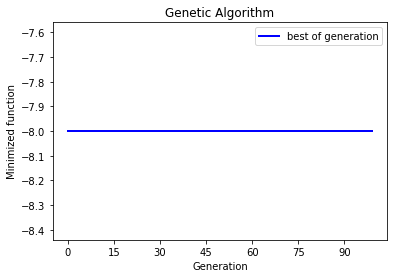

In [15]:
import time

#           Polye  Polyp
varbound = [[0,1],[0,2]]

model=ga(function=f,dimension=2,variable_type='int',variable_boundaries=varbound, algorithm_parameters=algorithm_param)

result = model.run()